<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [23]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [24]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [38]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [39]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [40]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


# 1. Boxplot of median value of owner-occupied homes.

21.2


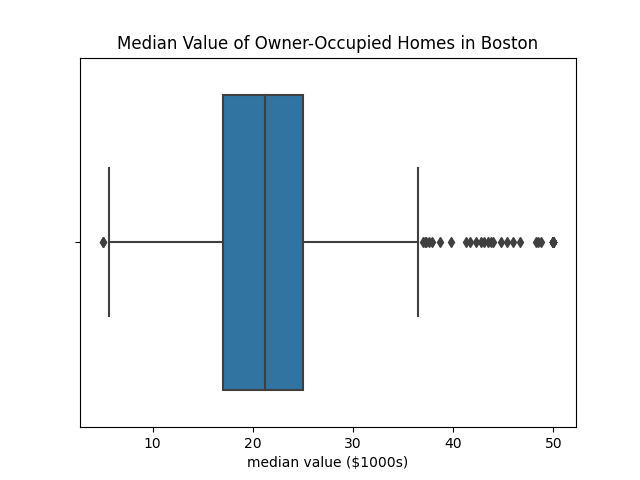

In [41]:
sns.boxplot(x=boston_df['MEDV'])
plt.xlabel('median value ($1000s)')
plt.title('Median Value of Owner-Occupied Homes in Boston')
medv = boston_df['MEDV']
print(medv.median())
plt.show()

The median value of owner-occupied homes is $21,200.

# 2. Bar plot of Charles River variable.

No     471
Yes     35
Name: CHAS_YN, dtype: int64


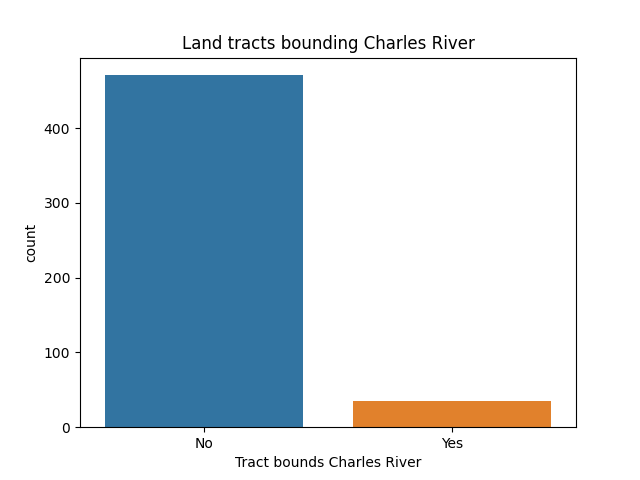

In [42]:
boston_df['CHAS_YN'] = boston_df['CHAS'].map({0.0: 'No', 1.0: 'Yes'})
print(boston_df['CHAS_YN'].value_counts())
sns.countplot(x='CHAS_YN', data=boston_df)
plt.xlabel('Tract bounds Charles River')                # set the x-axis label
plt.ylabel('count')               # set the y-axis label
plt.title('Land tracts bounding Charles River') # set the title
plt.show()

35 tracts bound the Charles River, while 471 do not.

# 3. Boxplot for the MEDV variable vs the AGE variable.

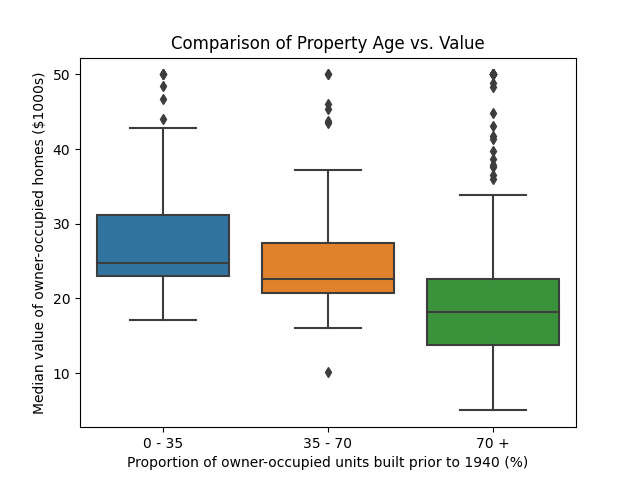

In [46]:
# Define the bins and their labels
bins = [0, 35, 70, boston_df['AGE'].max()]
labels = ['0 - 35', '35 - 70', '70 +']

# Discretize 'AGE'
boston_df['AGE_GROUPED'] = pd.cut(boston_df['AGE'], bins=bins, labels=labels)

sns.boxplot(x='AGE_GROUPED', y='MEDV', data=boston_df)
plt.xlabel('Proportion of owner-occupied units built prior to 1940 (%)')  # set the x-axis label
plt.ylabel('Median value of owner-occupied homes ($1000s)')  # set the y-axis label
plt.title('Comparison of Property Age vs. Value')  # set the title
plt.show()

Areas with a higher proportion of newer units have the highest value, on average.

# 4. Scatter plot showing the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town.

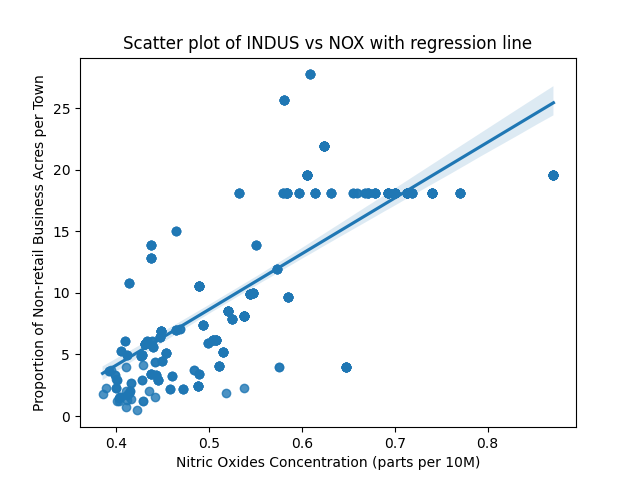

In [48]:
sns.regplot(x='NOX', y='INDUS', data=boston_df)
plt.xlabel('Nitric Oxides Concentration (parts per 10M)')  # set the x-axis label
plt.ylabel('Proportion of Non-retail Business Acres per Town')  # set the y-axis label
plt.title('Scatter plot of INDUS vs NOX with regression line')  # set the title
plt.show()

There appears to be a positive linear relationship between nitric oxide concentration and the industrial development of the area.

# 5. Create a histogram for the pupil to teacher ratio variable.

20.2    140
14.7     34
21.0     27
17.8     23
19.2     19
Name: PTRATIO, dtype: int64


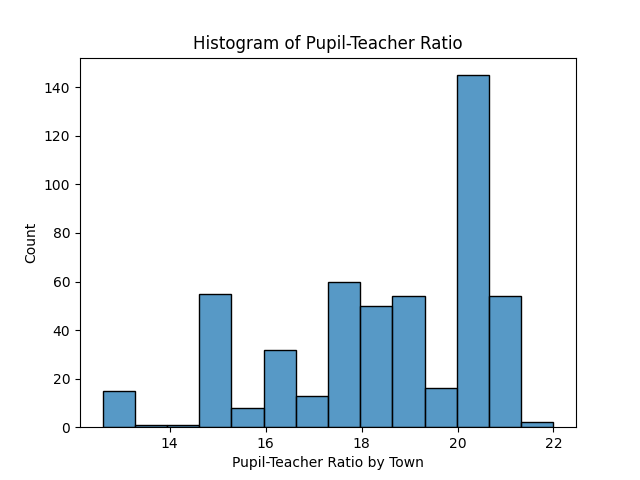

In [53]:
print(boston_df['PTRATIO'].value_counts().head())
sns.histplot(boston_df['PTRATIO'], kde=False)
plt.xlabel('Pupil-Teacher Ratio by Town')  # set the x-axis label
plt.ylabel('Count')  # set the y-axis label
plt.title('Histogram of Pupil-Teacher Ratio')  # set the title
plt.show()

The most common pupil-teacher ratio is 20.2.

# 6. Two sample t test for median value of homes bordered by Charles River or not.

Our null hypothesis is that there is no difference in the median value of homes bordering the Charles River vs. not bordering the Charles River.

In [58]:
# Separate the data into two groups
medv_yes = boston_df[boston_df['CHAS_YN'] == 'Yes']['MEDV']
medv_no = boston_df[boston_df['CHAS_YN'] == 'No']['MEDV']

# Perform the t-test
t_stat, p_val = scipy.stats.ttest_ind(medv_yes, medv_no)

print('t-statistic:', t_stat)
print('p-value:', p_val)

t-statistic: 3.996437466090509
p-value: 7.390623170519905e-05


The p-value is less than 0.05, therefore we reject the null hypothesis and conclude that there is a difference in the median value of homes bordering the Charles River vs. not bordering the Charles River.

# 7. ANOVA test for MEDV and AGE.

Our null hypothesis is that there is no difference between the three groups of property age in terms of their median value.

In [61]:
# Separate the data into groups
medv_young = boston_df[boston_df['AGE_GROUPED'] == '0 - 35']['MEDV']
medv_middle = boston_df[boston_df['AGE_GROUPED'] == '35 - 70']['MEDV']
medv_old = boston_df[boston_df['AGE_GROUPED'] == '70 +']['MEDV']

# Perform the ANOVA
f_stat, p_val = scipy.stats.f_oneway(medv_young, medv_middle, medv_old)

print('F-statistic:', f_stat)
print('p-value:', p_val)

F-statistic: 36.40764999196599
p-value: 1.7105011022702984e-15


The p-value is less than 0.05, therefore we reject the null hypothesis and conclude that there is a difference in the mean home value between at least one pair of the three age categories.

# 8. Pearson correlation between Nitric oxide concentrations and proportion of non-retail business acres per town.

The null hypothesis is that there is no correlation between Nitric oxide concentrations and proportion of non-retail business acres per town.

In [62]:
corr, p_val = scipy.stats.pearsonr(boston_df['INDUS'], boston_df['NOX'])

print('Pearson correlation coefficient:', corr)
print('p-value:', p_val)

Pearson correlation coefficient: 0.7636514469209189
p-value: 7.913361061211254e-98


The Pearson correlation coefficient of 0.76 implies a strong positive correlation. The p-value is less than 0.05, in fact it is almost zero, meaning we can reject the null hypothesis.

# 9. Regression to show impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes.

The null hypothesis is that there is no relationship between weighted distance to the five Boston employment centres and the median value of owner occupied homes.

In [64]:
# Add a constant to the independent value
X = sm.add_constant(boston_df['DIS'])

# construct the dependent variable
y = boston_df['MEDV']

# fit the model to the training set
model = sm.OLS(y, X)
results = model.fit()

# print the summary stats of the regression model
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Tue, 23 May 2023   Prob (F-statistic):           1.21e-08
Time:                        17:37:41   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0

For every unit increase in DIS, the median value increases by around $1,091.60. The p-value is less than 0.05, meaning we can reject the null hypothesis and conclude that there is a significant relationship.